## Scaling data and KNN regression:


Models like K-nearest neighbours (KNN) & neural networks  work better with scaled data, in order to achieve this, the data used for the model must be standardised. This is due to KNN using distances to find similar points for predictions, so big features outweigh small ones, thus scaling our data is necessary.

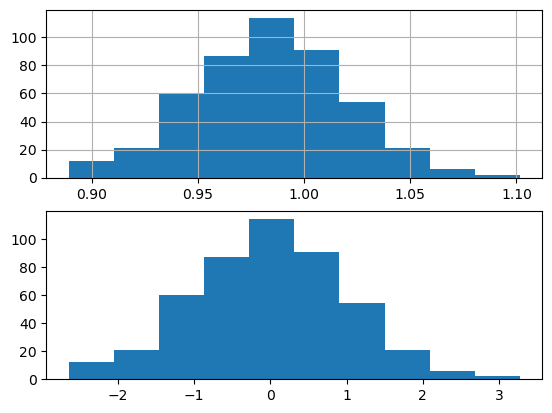

In [23]:
from sklearn.preprocessing import scale

# Removing unimportant features (weekdays)
train_features = train_features.iloc[:, :-4]
test_features = test_features.iloc[:, :-4]

# Standardising the train and test features
scaled_train_features = scale(train_features)
scaled_test_features = scale(test_features)

# Plotting histograms of the 14-day SMA RSI before and after scaling
f, ax = plt.subplots(nrows=2, ncols=1)
train_features.iloc[:, 2].hist(ax=ax[0])
ax[1].hist(scaled_train_features[:, 2])
plt.show()

### Optimising n_neighbours:
Now that the data has been scaled, the data is ready for a KNN model.
However, to maximise performance, tuning the model's hyperparameters is a good idea. For the KNN algorithm, there is only  one hyperparameter: n, the number of neighbours.

Trying a range of values for n is the best method to see which value for n generates the best perforing model. To measure performance R-squared values are calculated using .score() on the test set (scaled_test_features and test_targets) to then determine the best value for n.

In [24]:
from sklearn.neighbors import KNeighborsRegressor

for n in range(2,13):
    # Creating and fit the KNN model
    knn = KNeighborsRegressor(n_neighbors=n)
    
    # Fitting the model to the training data
    knn.fit(scaled_train_features, train_targets)
    
    # Printing number of neighbors and the score to find the best value of n
    print("n_neighbors =", n)
    print('train, test scores')
    print(knn.score(scaled_train_features, train_targets))
    print(knn.score(scaled_test_features, test_targets))
    print() 

n_neighbors = 2
train, test scores
0.6945553922012071
-0.7287922390211949

n_neighbors = 3
train, test scores
0.5789014396846152
-0.3553146789132018

n_neighbors = 4
train, test scores
0.503034698388253
-0.34149420585446943

n_neighbors = 5
train, test scores
0.45513334971624564
-0.25019082856244523

n_neighbors = 6
train, test scores
0.41700245729076324
-0.2509148131127681

n_neighbors = 7
train, test scores
0.3931680121533013
-0.1799989262610755

n_neighbors = 8
train, test scores
0.35863696258291333
-0.1291173011165847

n_neighbors = 9
train, test scores
0.32999957274375225
-0.1461742728280151

n_neighbors = 10
train, test scores
0.3016105918356726
-0.11038597200541389

n_neighbors = 11
train, test scores
0.29588143213219076
-0.1427536463419421

n_neighbors = 12
train, test scores
0.27481721884496924
-0.1481037807561738



* The best performing n here is n = 7, so this will be used for the model.

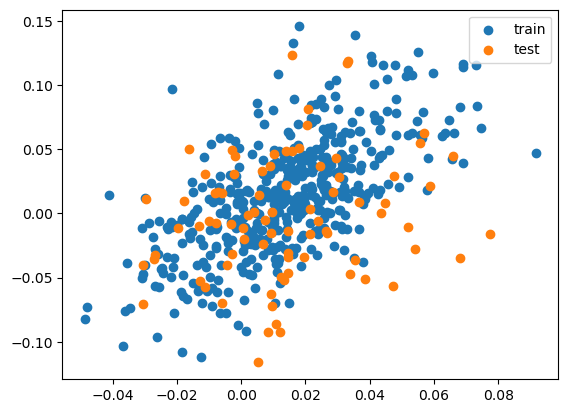

In [25]:
# Creating the model with the best-performing n_neighbors of 7
knn = KNeighborsRegressor(n_neighbors=7)

# Fitting the model
knn.fit(scaled_train_features, train_targets)

# Getting predictions for train and test sets
train_predictions = knn.predict(scaled_train_features)
test_predictions = knn.predict(scaled_test_features)

# Plotting the actual vs predicted values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.legend()
plt.show()

# Neural Networks:

To build our nets, the keras library will be used. The first thing to do is creating the simplest net possible: a 3-layer net that takes our inputs and predicts a single value.

To start, creating the dense layers set with their activiations, which in this model will be 'ReLU' and 'linear'.

In [26]:
from keras.models import Sequential
from keras.layers import Dense

# Creating the basic model
model_1 = Sequential()
model_1.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(1, activation='linear'))

# Fitting the model
model_1.compile(optimizer='adam', loss='mse')
history = model_1.fit(scaled_train_features, train_targets, epochs=25)

Epoch 1/25


2024-09-07 12:52:32.680981: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-07 12:52:32.721057: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_10.


15/15 [==============================] - 1s 16ms/step - loss: 0.0653
Epoch 2/25
15/15 [==============================] - 0s 8ms/step - loss: 0.0134
Epoch 3/25
15/15 [==============================] - 0s 7ms/step - loss: 0.0050
Epoch 4/25
15/15 [==============================] - 0s 7ms/step - loss: 0.0029
Epoch 5/25
15/15 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 6/25
15/15 [==============================] - 0s 7ms/step - loss: 0.0018
Epoch 7/25
15/15 [==============================] - 0s 7ms/step - loss: 0.0017
Epoch 8/25
15/15 [==============================] - 0s 7ms/step - loss: 0.0017
Epoch 9/25
15/15 [==============================] - 0s 7ms/step - loss: 0.0017
Epoch 10/25
15/15 [==============================] - 0s 7ms/step - loss: 0.0018
Epoch 11/25
15/15 [==============================] - 0s 8ms/step - loss: 0.0018
Epoch 12/25
15/15 [==============================] - 0s 7ms/step - loss: 0.0017
Epoch 13/25
15/15 [==============================] - 0s 7ms

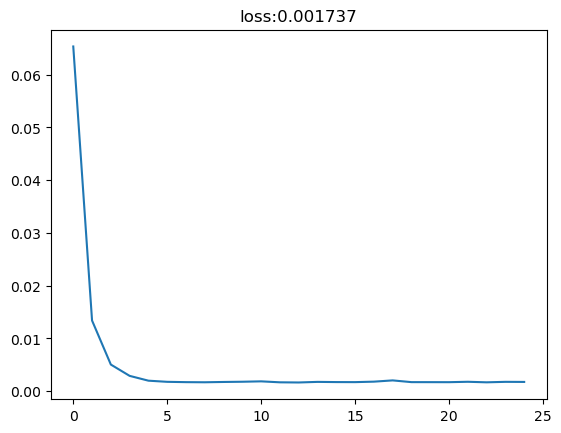

In [27]:
# Plotting the losses from the fit
plt.plot(history.history['loss'])

# Using the last loss as the title
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

After the basic model has been built, checking the training loss curve to make sure it's flattened out helps to make sure everythings working.

### Checking the performance of the basic model:

3/3 [==============================] - 0s 13ms/step


2024-09-07 12:55:40.631578: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


0.0721195610319304
-0.2009252736414351


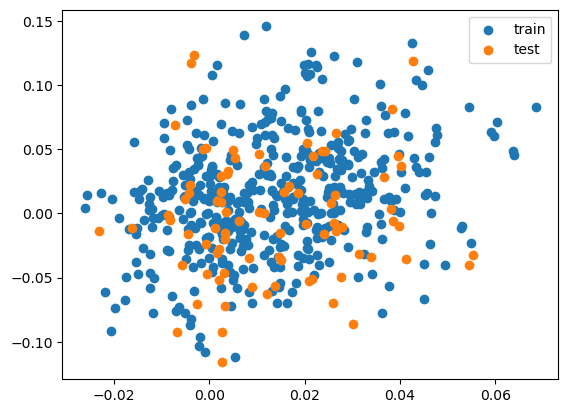

In [28]:
from sklearn.metrics import r2_score

# Calculating R-squared score
train_preds = model_1.predict(scaled_train_features)
test_preds = model_1.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Plotting predictions vs actual
plt.scatter(train_preds, train_targets, label = 'train')
plt.scatter(test_preds, test_targets, label = 'test')
plt.legend()
plt.show()

Previously, the mean squared error was used as a loss function. To further improve our model, it can be useful to implement a **custom loss function** for the topic of stock price prediction.

A **custom loss function** can uses a large penalty for predicting price movements in the wrong direction. This will help our net learn to at least predict price movements in the correct direction. 



In [29]:
import keras.losses
import tensorflow as tf

# Creating loss function
def sign_penalty(y_true, y_pred):
    penalty = 100.
    loss = tf.where(tf.less(y_true * y_pred, 0), \
                     penalty * tf.square(y_true - y_pred), \
                     tf.square(y_true - y_pred))

    return tf.reduce_mean(loss, axis=-1)

keras.losses.sign_penalty = sign_penalty # Setting with keras library
print(keras.losses.sign_penalty)

<function sign_penalty at 0x7fafe6018dc0>


### Fitting our net with the custom loss function:

Epoch 1/25


2024-09-07 13:12:55.148917: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-07 13:12:55.187708: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_10.


15/15 [==============================] - 1s 13ms/step - loss: 2.9807
Epoch 2/25
15/15 [==============================] - 0s 8ms/step - loss: 0.8161
Epoch 3/25
15/15 [==============================] - 0s 8ms/step - loss: 0.3400
Epoch 4/25
15/15 [==============================] - 0s 8ms/step - loss: 0.2011
Epoch 5/25
15/15 [==============================] - 0s 8ms/step - loss: 0.1207
Epoch 6/25
15/15 [==============================] - 0s 8ms/step - loss: 0.0997
Epoch 7/25
15/15 [==============================] - 0s 8ms/step - loss: 0.0999
Epoch 8/25
15/15 [==============================] - 0s 8ms/step - loss: 0.0701
Epoch 9/25
15/15 [==============================] - 0s 8ms/step - loss: 0.0924
Epoch 10/25
15/15 [==============================] - 0s 8ms/step - loss: 0.0810
Epoch 11/25
15/15 [==============================] - 0s 8ms/step - loss: 0.0806
Epoch 12/25
15/15 [==============================] - 0s 8ms/step - loss: 0.0826
Epoch 13/25
15/15 [==============================] - 0s 9ms

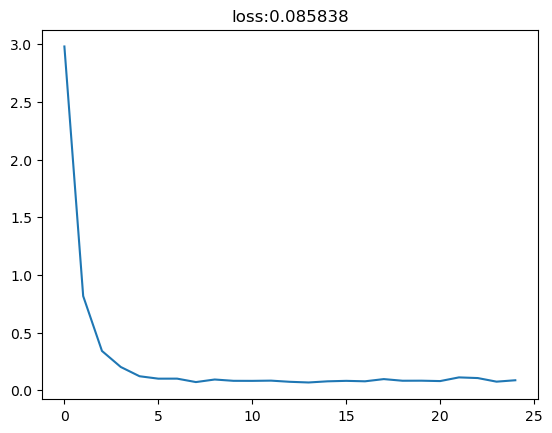

In [30]:
# Creating the model
model_2 = Sequential()
model_2.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_2.add(Dense(20, activation='relu'))
model_2.add(Dense(1, activation='linear'))

# Fitting the model with our custom 'sign_penalty' loss function
model_2.compile(optimizer='adam', loss=sign_penalty)
history = model_2.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

* To check perfromance of the custom loss model, R-squared scores are calculated once again:

3/3 [==============================] - 0s 5ms/step
0.05842072647973362
0.008969173447157197


2024-09-07 13:15:15.694371: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


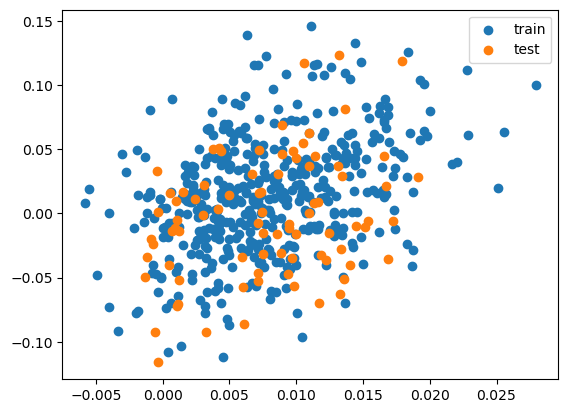

In [31]:
# Evaluating R-squared scores
train_preds = model_2.predict(scaled_train_features)
test_preds = model_2.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scattering the predictions vs actual
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')  # plotting the test set
plt.legend(); plt.show()

A common issue with neueral nets is overfitting. This means that the model is fitting to noise in the training data.

Methods to prevent over fitting include **dropout** and **ensembling**.

* Dropout randomly drops a set fraction of  neurons during the training phase, which helps prevent the net from fitting noise in the training data.
* Ensembling averages multiple predictions to calculate a final prediction.

## Dropout:

Epoch 1/25


2024-09-07 13:23:03.359496: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-07 13:23:03.395530: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_10.


15/15 [==============================] - 1s 12ms/step - loss: 0.2132
Epoch 2/25
15/15 [==============================] - 0s 7ms/step - loss: 0.1600
Epoch 3/25
15/15 [==============================] - 0s 7ms/step - loss: 0.0813
Epoch 4/25
15/15 [==============================] - 0s 7ms/step - loss: 0.0412
Epoch 5/25
15/15 [==============================] - 0s 7ms/step - loss: 0.0310
Epoch 6/25
15/15 [==============================] - 0s 8ms/step - loss: 0.0226
Epoch 7/25
15/15 [==============================] - 0s 7ms/step - loss: 0.0206
Epoch 8/25
15/15 [==============================] - 0s 7ms/step - loss: 0.0170
Epoch 9/25
15/15 [==============================] - 0s 7ms/step - loss: 0.0141
Epoch 10/25
15/15 [==============================] - 0s 7ms/step - loss: 0.0117
Epoch 11/25
15/15 [==============================] - 0s 7ms/step - loss: 0.0095
Epoch 12/25
15/15 [==============================] - 0s 7ms/step - loss: 0.0092
Epoch 13/25
15/15 [==============================] - 0s 8ms

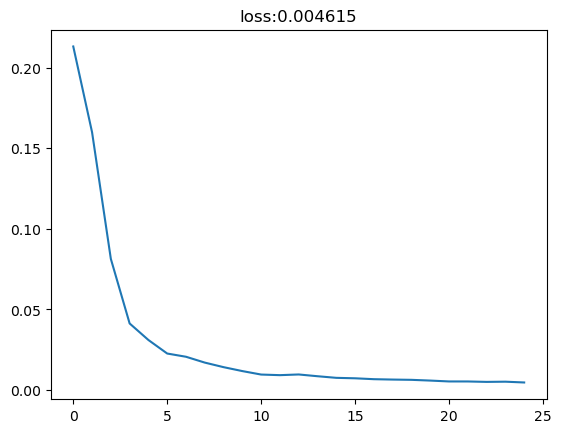

In [38]:
from keras.layers import Dropout

# Creating the model with dropout rate of 50% 
model_3 = Sequential()
model_3.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(20, activation='relu'))
model_3.add(Dense(1, activation='linear'))

# Fitting model with mean squared error loss function
model_3.compile(optimizer='adam', loss='mse')
history = model_3.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

## Ensembling:

In [39]:
# Making predictions from the 3 neural net models
train_pred1 = model_1.predict(scaled_train_features) # Basic model
test_pred1 = model_1.predict(scaled_test_features)

train_pred2 = model_2.predict(scaled_train_features) # Custom loss function model
test_pred2 = model_2.predict(scaled_test_features)

train_pred3 = model_3.predict(scaled_train_features) # Dropout model
test_pred3 = model_3.predict(scaled_test_features)

# Horizontally stacking the predictions and take the average across rows (ensembling method)
train_preds = np.mean(np.hstack((train_pred1, train_pred2, train_pred3)), axis=1)
test_preds = np.mean(np.hstack((test_pred1, test_pred2, test_pred3)), axis=1)
print(test_preds[-5:])

3/3 [==============================] - 0s 5ms/step
[0.0560068  0.06930464 0.05136458 0.03065797 0.04237064]


2024-09-07 13:23:08.878078: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


### Checking how the ensemble model performed:

0.08778870990556065
0.026681119991124547


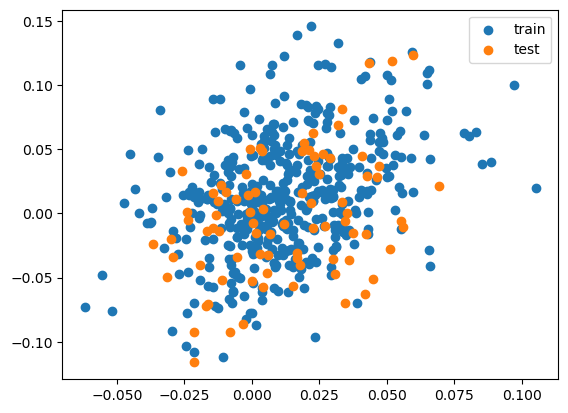

In [40]:
from sklearn.metrics import r2_score

# Evaluate the R-squared scores
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scatter the predictions vs actual 
plt.scatter(train_preds, train_targets, label = 'train')
plt.scatter(test_preds, test_targets, label = 'test')
plt.legend(); plt.show()